# Random Forest
<span style="font-size: 12px;">By: Marisol Hernandez</span>

In [56]:
import pandas as pd
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn import tree

## 1. Introduction to Random Forest
**Random Forest** is a popular machine learning algorithm that belongs to the *ensemble learning family*. It operates by constructing <u>multiple</u> decision trees during training and outputs the mode of the classes (**<span style="color: red;">classification</span>**) or mean prediction (**<span style="color: red;">regression</span>**) of the individual trees.

Each tree in a random forest is constructed independently using a random subset of the training data. Then, to make the prediction, each tree in the forest makes its own prediction, and the final prediction is taken by majority voting in the case of classification, or averaging in the case of regression.

## 2. Why Use Random Forest?

- **Accuracy**: Random Forest often produces more accurate results than individual decision trees.

- **Robustness**: It reduces overfitting by averaging multiple decision trees.

- **Feature Importance**: It provides insights into feature importance.

## 3. How Random Forest Works

1. **Bootstrapping**: Random Forest uses a technique called *bootstrapping* to create multiple datasets by sampling with replacement from the original dataset.

2. **Decision Trees**: For each bootstrapped dataset, a decision tree is constructed. However, not all features are used to split nodes in the trees. Instead, a random subset of features is chosen.
    - This adds another layer of randomness to the model, which helps to increase the diversity among the trees and improve the overall model robustness.

3. **Aggregation**: For **<span style="color: red;">classification</span>** tasks, the final prediction is based on the majority vote of all the individual trees. For **<span style="color: red;">regression</span>** tasks, the prediction is based on the average of the outputs.

<p align="center">
  <img src="imgs/random_forest1.png" alt="Alt text" width="600" height="350">
</p>

The random forest structure, with its combination of randomness and aggregation, helps to create a robust model that is less prone to overfitting the training data compared to a single decision tree.

## 4. Random Forest for Classification
Now we'll explore another example using the iris same dataset we used to train a Decision Tree classifier in the previous notebook. Recall that the dataset has already been previously treated with a full EDA.

### Step 1. Read and perform EDA on the dataset


In [2]:
# Load the iris dataset
iris = load_iris()

# Define the labels
labels = iris.target_names

# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable as species names
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].apply(lambda x: labels[x])

# Display the DataFrame
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Visualizing the Dataset with Pairplot
A **pairplot** is a function provided by the `seaborn` library that creates a grid of scatter plots for each pair of features in a dataset. It is a powerful visualization tool for understanding the relationships between multiple variables and how they differ between categories.

In our Iris dataset, we have four features: sepal length, sepal width, petal length, and petal width. The pairplot will create scatter plots for each pair of these features, showing how they relate to each other. Additionally, we will color-code the points based on the species of the iris flowers (Setosa, Versicolor, and Virginica) to observe how the feature distributions differ among the species.

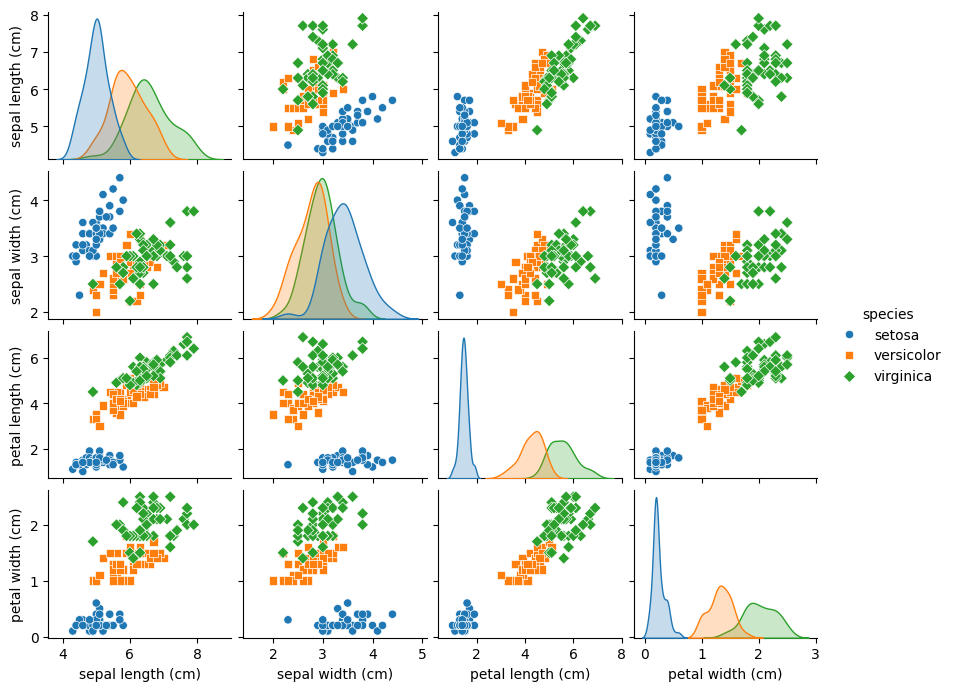

In [3]:
# Visualize the dataset
sns.pairplot(iris_df, hue='species', markers=['o', 's', 'D'], height=1.75, aspect=1.2)
plt.show()

By examining the pairplot, we can identify patterns and relationships between different features. For example, we might observe that Setosa flowers tend to cluster in certain regions of the feature space, while Versicolor and Virginica flowers might overlap more.

Before we can do a train/test split we must first separate the features and target.

In [4]:
# Separate the features and target
X = iris_df.drop('species', axis=1)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# Separate the features and target
y = iris_df['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

### Step 2. train/test Split
The *train* set will be used to train the model, while the *test* set will be used to evaluate the effectiveness of the model.

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


In [7]:
# Inspect X_train
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3


### Step 3: Model initialization and training
We then train a Random Forest model using the training data. In this example, I set `n_estimators` to 3. This means my Random Forest will construct just 3 decision trees. This is to simplify the example.

In [9]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=3, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

Once the model has been trained correctly, we can visualize the random forest with the same library. This visualization will show each complete derived tree:

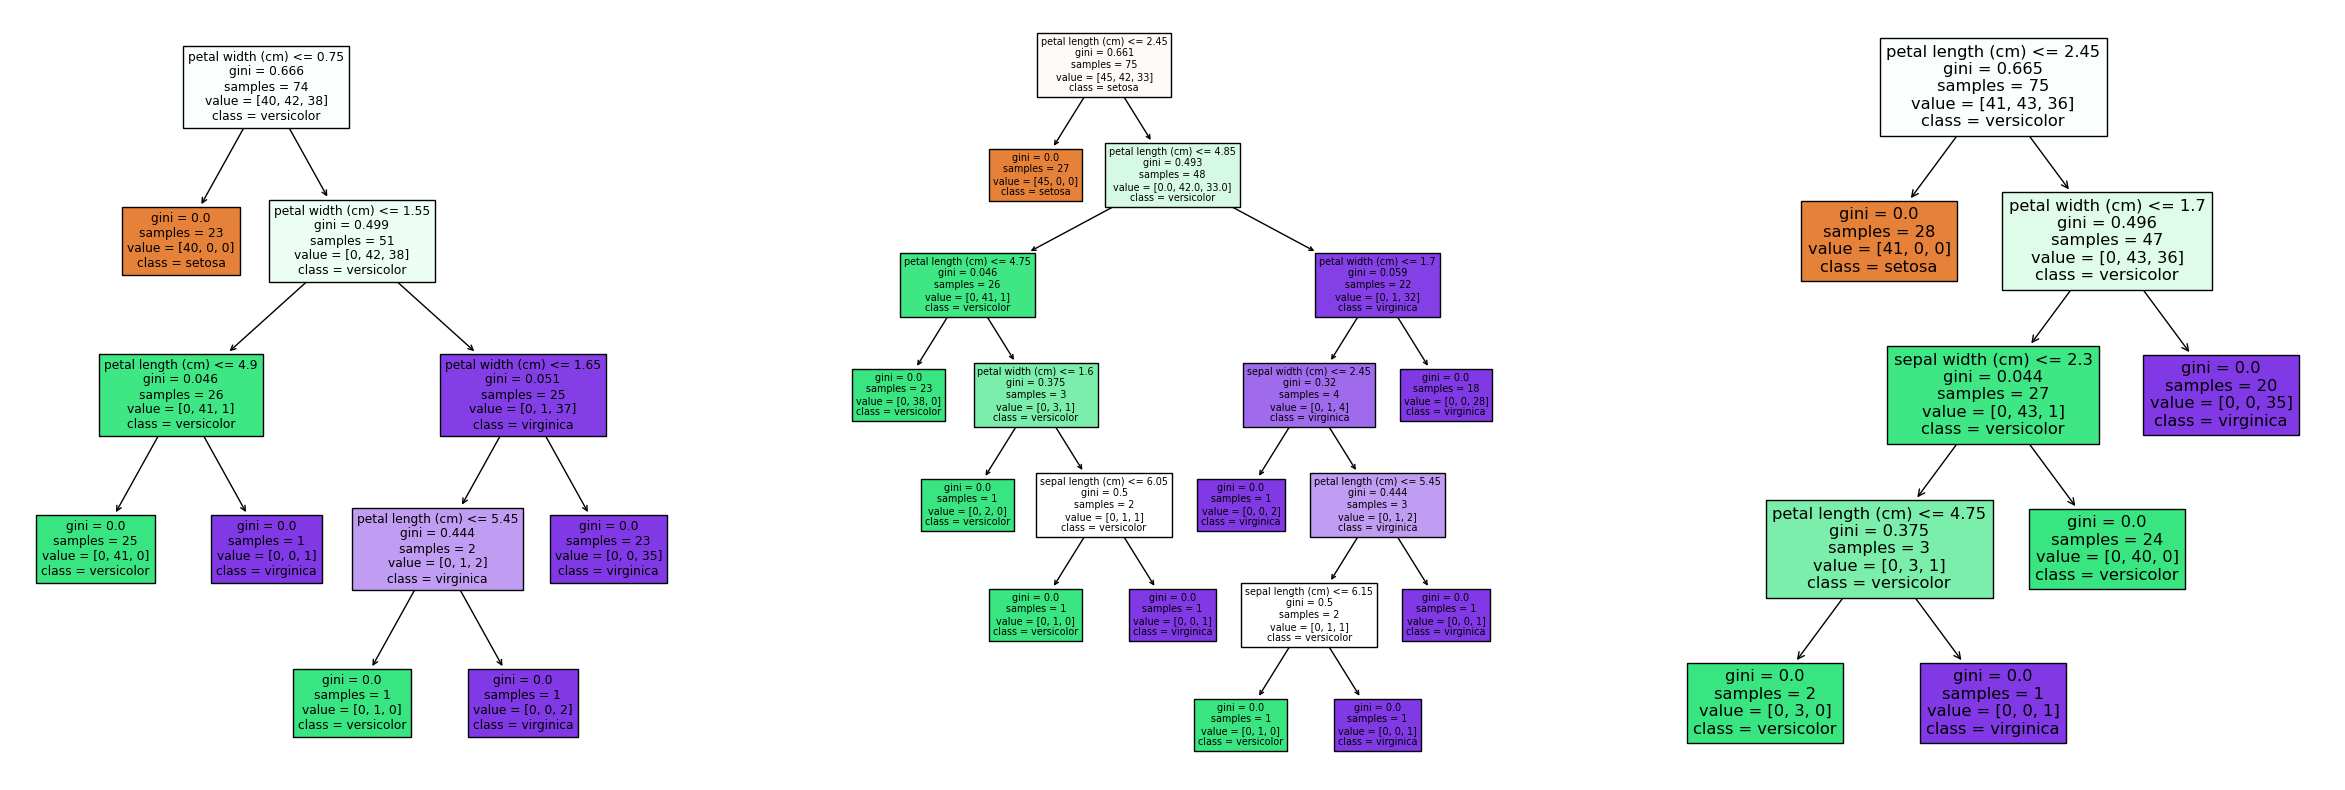

In [18]:
fig, axis = plt.subplots(1, 3, figsize = (30, 10))

# Show the 3 trees
tree.plot_tree(model.estimators_[0], ax = axis[0], feature_names = list(X_train.columns), class_names = labels, filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[1], feature_names = list(X_train.columns), class_names = labels, filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[2], feature_names = list(X_train.columns), class_names = labels, filled = True)

plt.show()

### Step 4: Model Evaluation

We will use the trained model to make predictions on the test data

In [19]:
# Predict the labels for the test set
y_pred = model.predict(X_test)

test_df = X_test.copy()
test_df["species"] = y_test
test_df["Predictions"] = y_pred
test_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Predictions
38,4.4,3.0,1.3,0.2,setosa,setosa
127,6.1,3.0,4.9,1.8,virginica,virginica
57,4.9,2.4,3.3,1.0,versicolor,versicolor
93,5.0,2.3,3.3,1.0,versicolor,versicolor
42,4.4,3.2,1.3,0.2,setosa,setosa


We can visualize the decision path for the first test data point:

In [20]:
test_df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Predictions
38,4.4,3.0,1.3,0.2,setosa,setosa


<p align="center">
  <img src="imgs/random_forest2.png" alt="Alt text" width="1000" height="500">
</p>

Lets evaluate its performance using accuracy, confusion matrix, and classification report.

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}\n')
print('Confusion Matrix:')
print(cm)
print('\nClassification Report:')
print(cr)

Accuracy: 0.9666666666666667

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



We can visualize the confusion matrix to better understand the performance of our model.

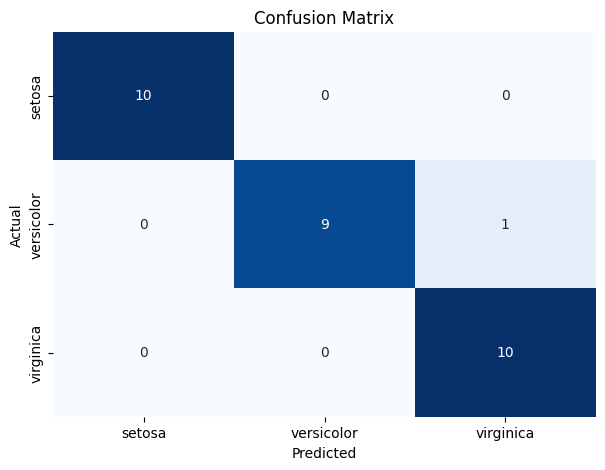

In [22]:
# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Step 5: Model Optimization
Some of a random forest's hyperparameters include:

- `n_estimators`: This is probably the most important hyperparameter. It defines the number of decision trees in the forest. In general, a larger number of trees increases the accuracy and makes the predictions more stable, but it can also slow down the computation time considerably.

- `bootstrap`: This hyperparameter is used to control whether bootstrap samples (sampling with replacement) are used for tree construction.

- `max_depth`: The maximum depth of the trees. This is essentially how many splits the tree can make before making a prediction.

- `min_samples_split`: The minimum number of samples needed to split a node in each tree. If set to a high value, it prevents the model from learning too specific relationships and thus helps prevent overfitting.

- `min_samples_leaf`: The minimum number of samples to have in a leaf node in each tree.

- `max_features`: The maximum number of features to consider when looking for the best split within each tree. For example, if we have 10 features, we can choose to have each tree consider only a subset of them when deciding where to split.

As we can see, only the first two hyperparameters refer to the random forest, while the rest are related to the decision trees. 

Another very important hyperparameter is the `random_state`, which controls the random generation seed. This attribute is crucial to ensure replicability.

Let's play around and test some values for `max_depth` as an example.

In [23]:
# Initialize and train another Random Forest model while adjusting max_depth
my_other_model = RandomForestClassifier(max_depth=3, random_state=42)
my_other_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

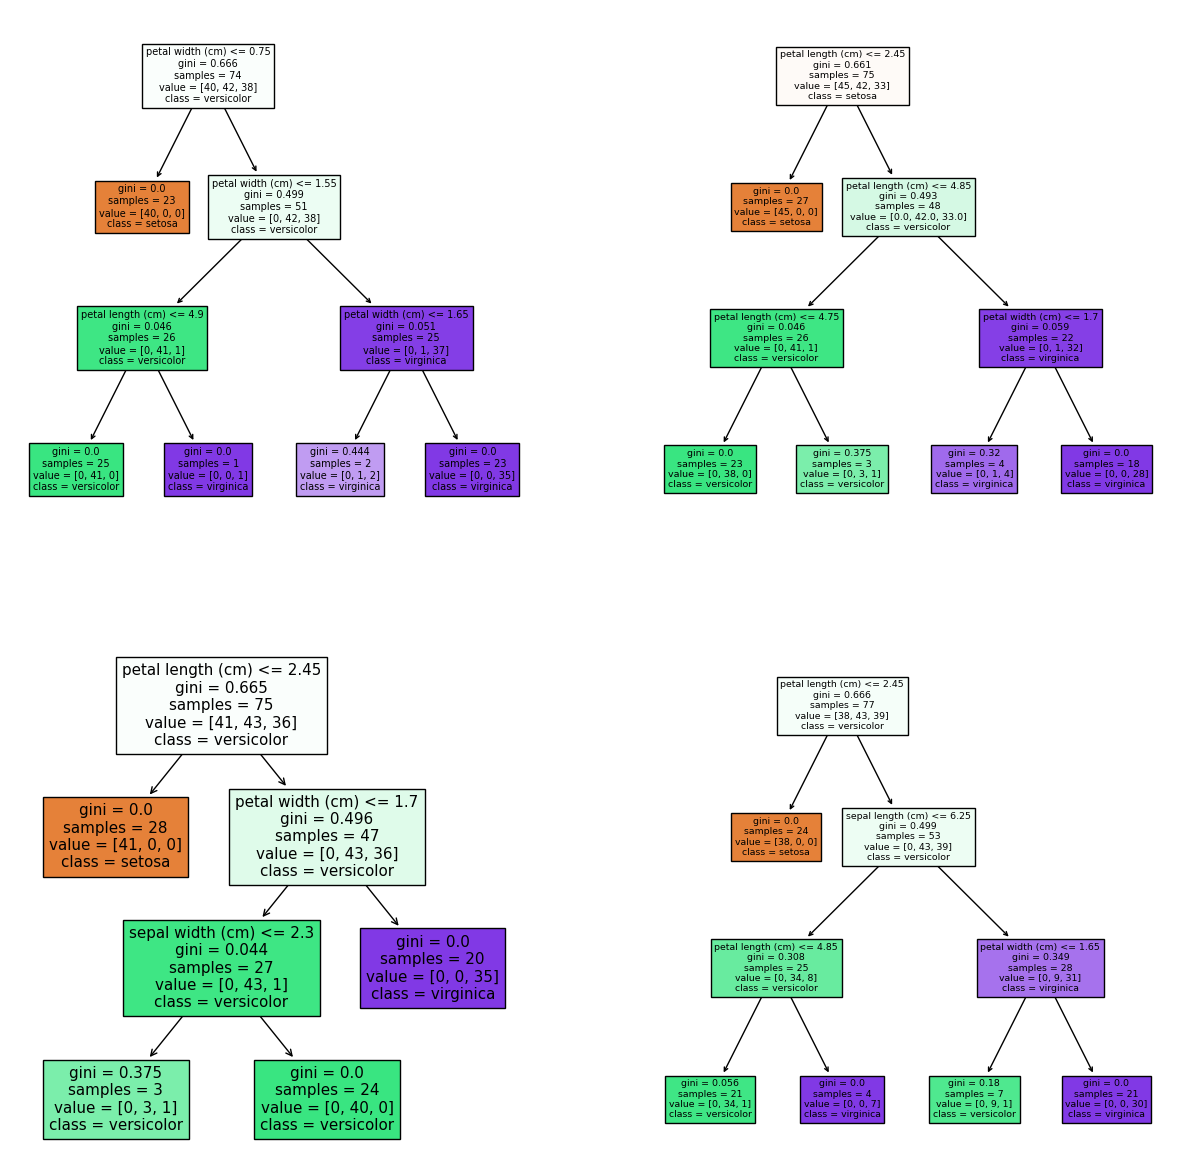

In [24]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(my_other_model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = labels, filled = True)
tree.plot_tree(my_other_model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = labels, filled = True)
tree.plot_tree(my_other_model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = labels, filled = True)
tree.plot_tree(my_other_model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = labels, filled = True)

plt.show()

In [27]:
# Define the parameter grid
param_grid = {
    'n_estimators': [3, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")

Best parameters found: {'max_depth': None, 'n_estimators': 3}


In [28]:
# Predict on the test set with the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [29]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [1.         0.95833333 0.95833333 0.91666667 1.        ]
Mean cross-validation score: 0.9666666666666668


### Step 6: Making Predictions

In [30]:
# Generate a new random data point (for demonstration)
new_data_df = pd.DataFrame([[6.0, 3.0, 5.0, 2.0]], columns=iris.feature_names)

# Predict the species of the new data point
predicted_species = best_model.predict(new_data_df)
new_data_df["Prediction"] = predicted_species

new_data_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Prediction
0,6.0,3.0,5.0,2.0,virginica


## 5. Random Forest for Regression
Random Forest can also be used for <u>regression</u> tasks. Let's explore this through a simple example.

The objective is to train a random forest to predict the target variable, `MedianHouseValue`.

### Step 1. Read and perform EDA on the dataset

In [45]:
# Load dataset
data = fetch_california_housing()

# Create a DataFrame from the data
df = pd.DataFrame(data.data, columns=data.feature_names)

# Subset some of the features to simplify this example
df = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']]

# Add the target variable to the DataFrame
df['MedianHouseValue'] = data.target

# Sample 10 rows to simplify this example
df = df.sample(n=10, random_state=42)

# Display the first few rows of the DataFrame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,MedianHouseValue
20046,1.6812,25.0,4.192201,1.022284,0.47700
3024,2.5313,30.0,5.039384,1.193493,0.45800
15663,3.4801,52.0,3.977155,1.185877,5.00001
20484,5.7376,17.0,6.163636,1.020202,2.18600
9814,3.7250,34.0,5.492991,1.028037,2.78000


Here’s a brief overview of what each feature represents:

- `MedInc`: Median income in the block group

- `HouseAge`: Median age of the houses in the block group

- `AveRooms`: Average number of rooms per household

- `AveBedrms`: Average number of bedrooms per household

- `MedianHouseValue` (Target): Median house value for households within a block group, expressed in hundreds of thousands of dollars (i.e., $100,000s)

In [46]:
# Separate the features and target
X = df.drop('MedianHouseValue', axis=1)
X

,MedInc,HouseAge,AveRooms,AveBedrms
20046,1.6812,25.0,4.192201,1.022284
3024,2.5313,30.0,5.039384,1.193493
15663,3.4801,52.0,3.977155,1.185877
20484,5.7376,17.0,6.163636,1.020202
9814,3.7250,34.0,5.492991,1.028037
13311,4.7147,12.0,5.251483,0.975089
7113,5.0839,36.0,6.221719,1.095023
7668,3.6908,38.0,4.962825,1.048327
18246,4.8036,4.0,3.924658,1.035959
5723,8.1132,45.0,6.879056,1.011799


In [47]:
# Separate the features and target
y = df['MedianHouseValue']
y

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
13311    1.58700
7113     1.98200
7668     1.57500
18246    3.40000
5723     4.46600
Name: MedianHouseValue, dtype: float64

### Step 2. train/test Split

In [48]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8, 4)
y_train shape: (8,)
X_test shape: (2, 4)
y_test shape: (2,)


In [49]:
# Inspect X_train
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms
13311,4.7147,12.0,5.251483,0.975089
20046,1.6812,25.0,4.192201,1.022284
7668,3.6908,38.0,4.962825,1.048327
15663,3.4801,52.0,3.977155,1.185877
5723,8.1132,45.0,6.879056,1.011799


### Step 3: Model initialization and training
Since this is a regression task, note the use of `scikit-learn`'s `RandomForestRegressor` instead of `RandomForestClassifier`.  In this example, I set `n_estimators` to 3. This means my Random Forest will construct just 3 decision trees. This is to simplify the example.

In [50]:
model = RandomForestRegressor(n_estimators=3, random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=3, random_state=42)

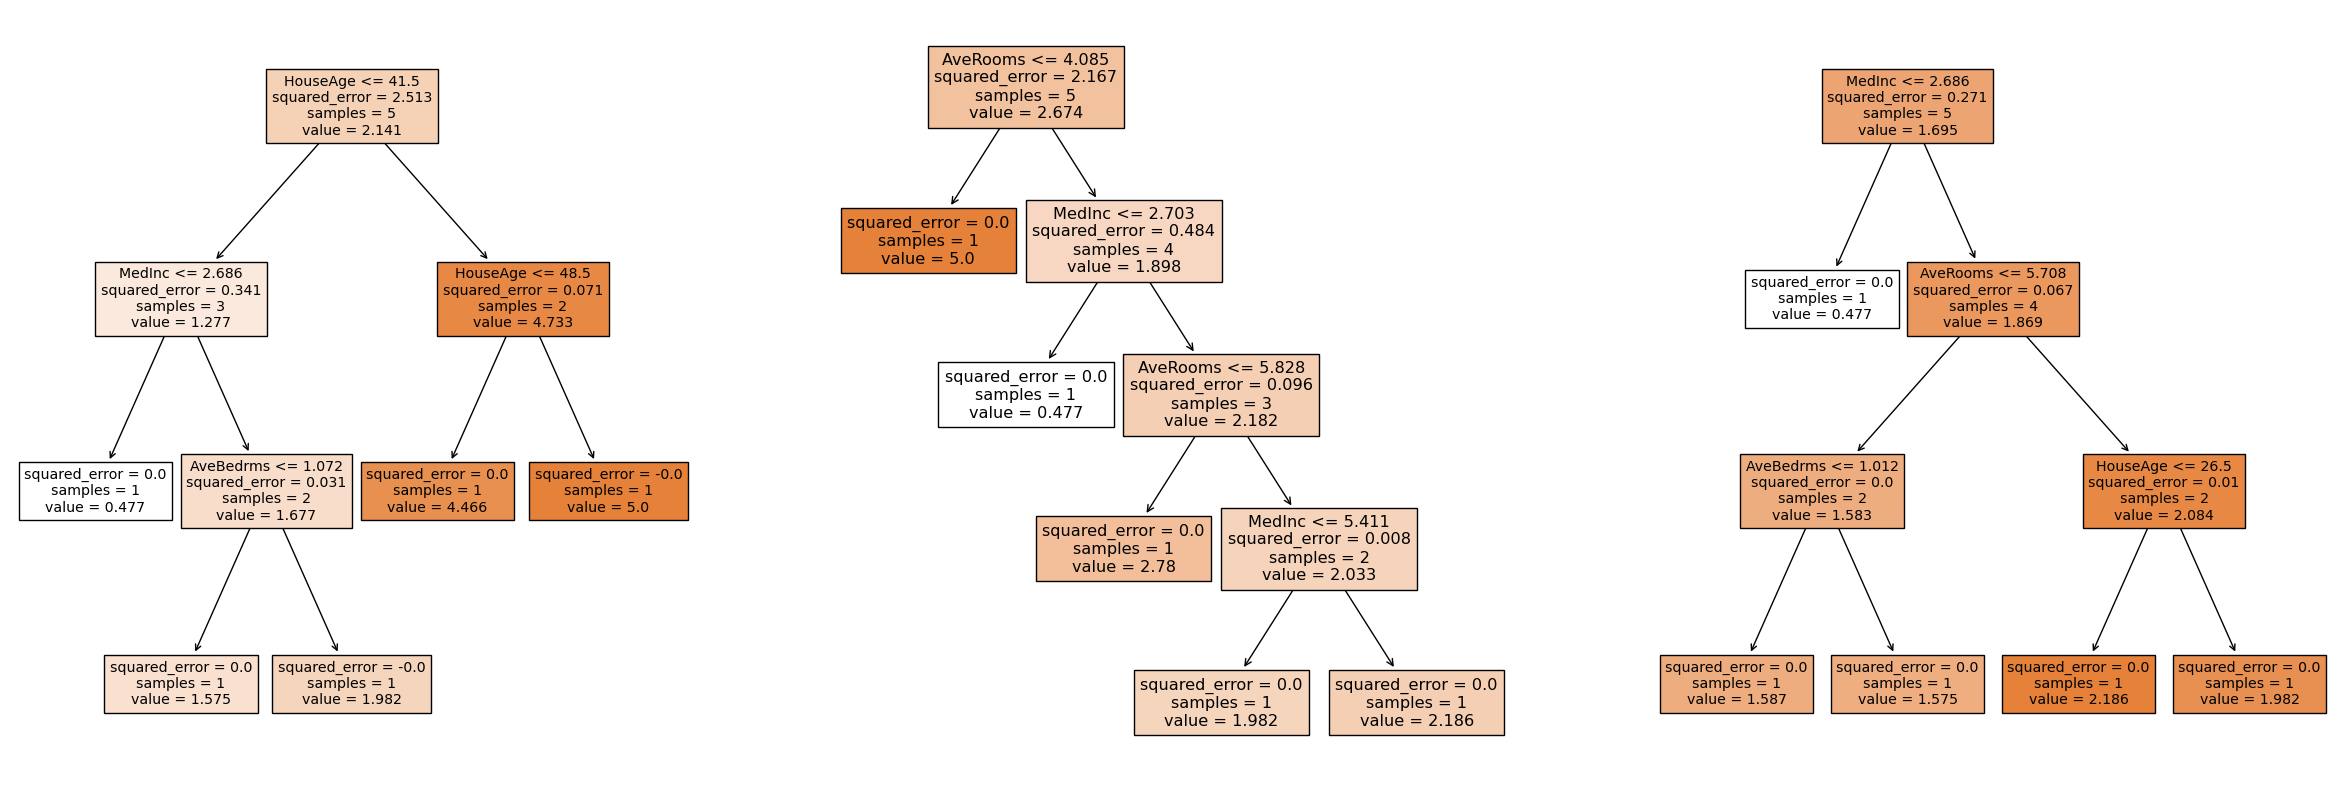

In [51]:
fig, axis = plt.subplots(1, 3, figsize = (30, 10))

# Show the 3 trees
tree.plot_tree(model.estimators_[0], ax = axis[0], feature_names = list(X_train.columns), class_names = labels, filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[1], feature_names = list(X_train.columns), class_names = labels, filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[2], feature_names = list(X_train.columns), class_names = labels, filled = True)

plt.show()

### Step 4: Model Evaluation

We will use the trained model to make predictions on the test data

In [52]:
# Predict the labels for the test set
y_pred = model.predict(X_test)

test_df = X_test.copy()
test_df["MedianHouseValue"] = y_test
test_df["Predictions"] = y_pred
test_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,MedianHouseValue,Predictions
18246,4.8036,4.0,3.924658,1.035959,3.400,2.71667
3024,2.5313,30.0,5.039384,1.193493,0.458,0.47700


We can visualize the decision path for the first test data point:

In [53]:
test_df.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,MedianHouseValue,Predictions
18246,4.8036,4.0,3.924658,1.035959,3.4,2.71667


<p align="center">
  <img src="imgs/random_forest3.png" alt="Alt text" width="1000" height="500">
</p>

Remember that the output of a `RandomForestRegressor` is always the average of the output of each decision tree. For this example,

$$\hat{y} = \frac{1}{3}(1.575 + 5.0 + 1.575)$$

$$ \approx 2.71667 $$

Given the small test set, we can calculate the MSE by hand,

In [54]:
# Reprinting test predictions
test_df

,MedInc,HouseAge,AveRooms,AveBedrms,MedianHouseValue,Predictions
18246,4.8036,4.0,3.924658,1.035959,3.400,2.71667
3024,2.5313,30.0,5.039384,1.193493,0.458,0.47700


Recall that MSE measures the average squared difference between the predicted values and the actual values.

Mathematically, MSE is calculated as:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

We can evaluate the MSE from our 2 test data points,

$$ MSE = \frac{1}{2} \sum_{i=1}^{2} (y_i - \hat{y}_i)^2 $$

$$ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ = \frac{1}{2} ((y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2) $$

$$ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ = \frac{1}{2} ((3.400 - 2.71667)^2 + (0.458 - 0.47700)^2) $$

$$ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~ = \frac{1}{2} (0.4669 + 0.000361) $$

$$ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~ \approx 0.233650 $$

In [57]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")

Mean squared error: 0.23365044444999986
